Predicting the test results of a disease, such as COVID-19, accurately using machine learning has several important implications in today's world:

1.Early detection and intervention: Accurate prediction of disease test results can enable early detection of the disease, which can lead to timely intervention and treatment. Early diagnosis allows for prompt isolation of infected individuals, contact tracing, and appropriate medical care, which can help prevent the spread of the disease and improve patient outcomes.

2.Resource allocation and healthcare burden reduction: Accurate prediction of disease test results can help in effective allocation of healthcare resources, such as hospital beds, ventilators, and medical personnel, to those who are more likely to test positive. This can help in managing healthcare burden, optimizing resource utilization, and ensuring that healthcare facilities are prepared to handle the influx of patients.

3.Improved patient management: Accurate prediction of disease test results can aid in better patient management, including personalized treatment plans and monitoring. It can also help in identifying high-risk patients who may require more intensive care and support.

4.Cost-effective screening: Accurate prediction of disease test results can help in targeted screening efforts, focusing on individuals who are more likely to test positive. This can result in cost-effective screening strategies, reducing unnecessary testing and associated costs.

5.Future applicability: The knowledge and insights gained from developing a machine learning model for predicting disease test results can be applicable to other diseases as well. The methodologies, techniques, and data analysis approaches used in the proposed model can potentially be adapted for other infectious diseases or health conditions, thus contributing to the broader field of medical research and healthcare.

The gap in knowledge that the proposed method can potentially address could be related to the lack of accurate and timely prediction of disease test results, which could lead to delays in diagnosis, treatment, and resource allocation. By developing a machine learning model that can accurately predict disease test results, we can bridge this gap and contribute to improving healthcare outcomes, reducing healthcare burden, and advancing medical research in the field of infectious diseases.

In [1]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix,classification_report


Matplotlib is building the font cache; this may take a moment.


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#uploading dataset

covid=pd.read_csv("/content/corona_tested_006.csv")


FileNotFoundError: [Errno 2] No such file or directory: '/content/corona_tested_006.csv'

In [ ]:
#creating a copy
covid_data=covid.copy(deep=True)

In [ ]:
covid_data.shape

In [ ]:
covid_data.drop_duplicates()

In [ ]:
covid_data.shape

There was not any duplicate data

In [ ]:
covid_data.head()

In [ ]:
covid_data.tail()

In [ ]:
#checking number of null values
covid_data.isnull().sum()

There are not any null values.Exploring to check for any unusual data

In [ ]:
covid_data.info()

In [ ]:
#converting to categorical variable
covid_data=covid_data.astype('category')

In [ ]:
covid_data.info()

In [ ]:
print(covid_data.Cough_symptoms.value_counts())
print(covid_data.Fever.value_counts())
print(covid_data.Sore_throat.value_counts())
print(covid_data.Shortness_of_breath.value_counts())
print(covid_data.Headache.value_counts())
print(covid_data.Corona.value_counts())
print(covid_data.Age_60_above.value_counts())
print(covid_data.Sex.value_counts())


most of the column has 'True' and 'TRUE' which needs to considered as same.

In [ ]:
#defining a function for the same
def convert(x):
  if x==True:
    return 'true'
  elif x==False:
    return 'false'
  elif x=='TRUE':
    return x.lower()
  elif x=='FALSE':
    return x.lower()
  else:
    return x
  



In [ ]:
#applying the defined function
covid_data['Cough_symptoms']=covid_data['Cough_symptoms'].map(convert)
covid_data['Fever']=covid_data['Fever'].map(convert)
covid_data['Sore_throat']=covid_data['Sore_throat'].map(convert)
covid_data['Shortness_of_breath']=covid_data['Shortness_of_breath'].map(convert)
covid_data['Headache']=covid_data['Headache'].map(convert)

In [ ]:
covid_data

In [ ]:
#replacing 'None' and 'Other' with nan
covid_data=covid_data.replace('None',np.nan)
covid_data=covid_data.replace('Other',np.nan)
covid_data=covid_data.replace('other',np.nan)
covid_data

In [ ]:
covid_data.isnull().sum()

In [ ]:
#percentage of missing values
covid_data.isnull().mean() * 100

Since ##Age_60_above## and ##Known_contact## have very large number of missing values so we need to drop these columns

In [ ]:
covid_data=covid_data.drop(['Age_60_above','Ind_ID','Known_contact'],axis=1)


In [ ]:
covid_data.isnull().sum()

In [ ]:
#removing rows with less than 1% missing values
covid_data=covid_data.dropna(subset=['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Corona'])

In [ ]:
covid_data.isnull().sum()

In [ ]:
#imputing missing values
covid_data.fillna(method='bfill',inplace=True)

In [ ]:
covid_data.isnull().sum()

Exploratory Data Analysis

In [ ]:
sns.countplot(x='Test_date',hue='Corona',data=covid_data)
plt.show()

As number of testing increased, the infection rate reduced.

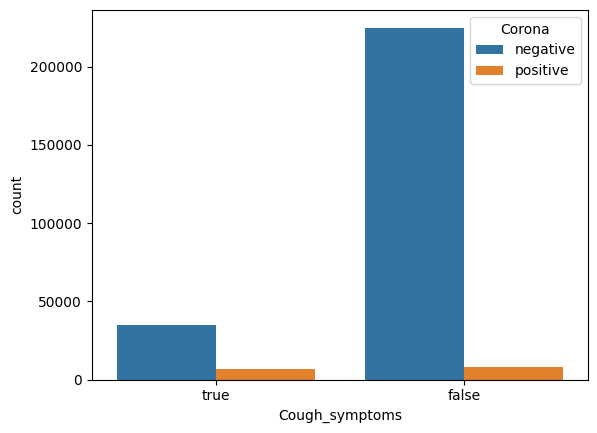

In [29]:
sns.countplot(x='Cough_symptoms',hue='Corona',data=covid_data)
plt.show()

People having cough symptoms are less likely to be covid negative

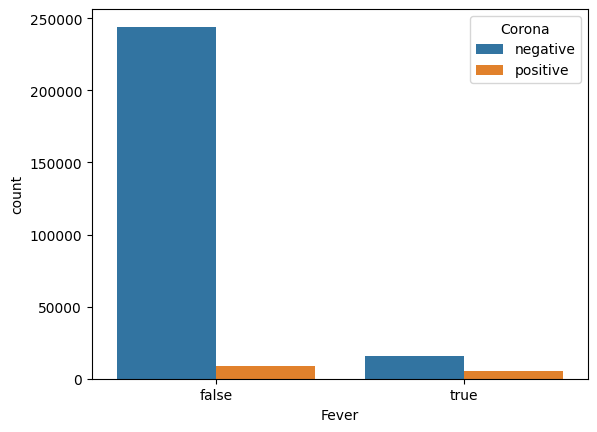

In [30]:
sns.countplot(x='Fever',hue='Corona',data=covid_data)
plt.show()

People having fever symptoms are very less likely to be covid negative

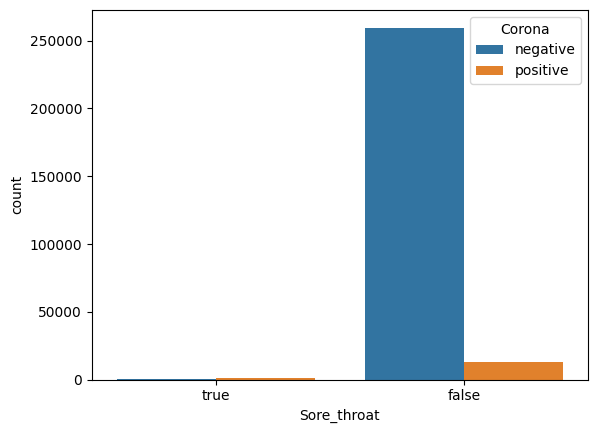

In [31]:
sns.countplot(x='Sore_throat', hue='Corona', data=covid_data)
plt.show()

Very few patients have sore throat and they are highly prone to covid positive.

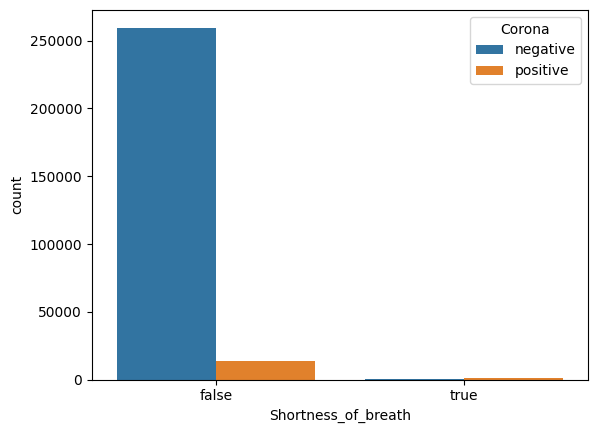

In [32]:
sns.countplot(x='Shortness_of_breath', hue='Corona', data=covid_data)
plt.show()

Similar to sore throat, Shortness of breath is also a symptom to identify the covid patients easily.

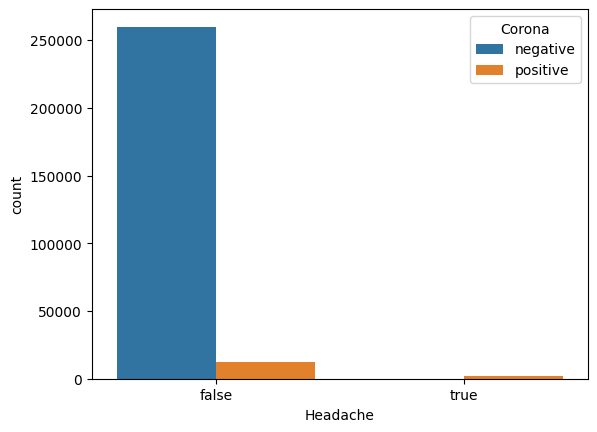

In [33]:
sns.countplot(x='Headache', hue='Corona', data=covid_data)
plt.show()

Just a few patients have this symtom but they are highly prone to be postive

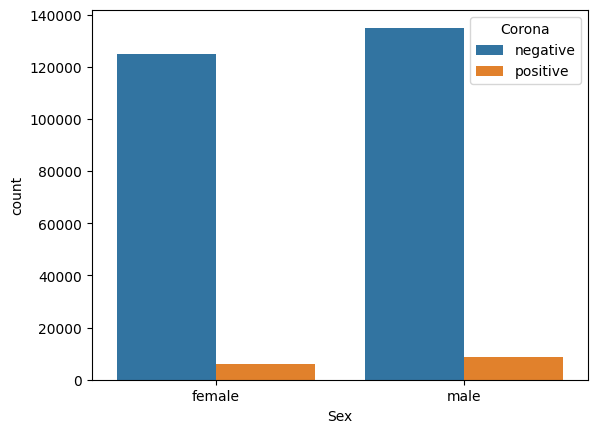

In [34]:
sns.countplot(x='Sex', hue='Corona', data=covid_data)
plt.show()

Gender does not have considerable affect on being covid positive or negative.

In [35]:
#encoding the categorical data
covid_data.drop('Test_date',axis=1,inplace=True)
encoded=pd.get_dummies(covid_data,drop_first=True)

In [36]:
encoded=encoded.astype('category')

Important Features selection

In [37]:
#seperating features and target variable
X=encoded.drop('Corona_positive',axis=1)
y=encoded['Corona_positive']

In [38]:
#selecting top 5 methods using chi2
selector=SelectKBest(score_func=chi2,k=5)
X_new=selector.fit_transform(X,y)

In [39]:
#masking the boolean array indicating the status of each feature
mask=selector.get_support()

#convert the boolean array to a list of indices
selected_feature_indices=mask.nonzero()[0]

#use the indices to get the names of the selected features
selected_features_names=X.columns[selected_feature_indices]
selected_features_names


Index(['Cough_symptoms_true', 'Fever_true', 'Sore_throat_true',
       'Shortness_of_breath_true', 'Headache_true'],
      dtype='object')

In [40]:
#removing less important features
feature_data=encoded.drop('Sex_male',axis=True)

In [41]:
#seperating features and target variable for test train split
features=feature_data.drop('Corona_positive',axis=True)
target=feature_data['Corona_positive']

Model Creation

In [42]:
#splitting the dataset
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=42)
logistic_regression=LogisticRegression(solver='lbfgs',multi_class='auto',random_state=42)
logistic_regression.fit(x_train,y_train)

y_train_lr=logistic_regression.predict(x_train)
y_pred_lr=logistic_regression.predict(x_test)

acc_train_lr=accuracy_score(y_train,y_train_lr)
print("accuracy score for training logistic regression is",acc_train_lr)

accuracy score for training logistic regression is 0.956714201120247


In [43]:
acc_logistic=accuracy_score(y_test,y_pred_lr)
prec_logistic=precision_score(y_test,y_pred_lr)
recall_logistic=recall_score(y_test,y_pred_lr)
f1_logistic=f1_score(y_test,y_pred_lr)
conf_matrix_lr=confusion_matrix(y_test,y_pred_lr)

print("confusion matrix: \n",conf_matrix_lr)

confusion matrix: 
 [[64894   159]
 [ 2770   853]]


In [44]:
print(acc_logistic)
print(prec_logistic)
print(recall_logistic)
print(f1_logistic)

0.957350457219407
0.8428853754940712
0.2354402428926304
0.3680690399137001


In [45]:
class_report_lg=classification_report(y_test,y_pred_lr)
print(class_report_lg)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     65053
           1       0.84      0.24      0.37      3623

    accuracy                           0.96     68676
   macro avg       0.90      0.62      0.67     68676
weighted avg       0.95      0.96      0.95     68676



In [46]:
#cross validation
from sklearn.model_selection import cross_val_score
cv_scores=cross_val_score(logistic_regression,features,target,cv=5)
print(cv_scores)

mean_cv_score=cv_scores.mean()

print("mean accuracy score: {}".format(mean_cv_score))

[0.9579367  0.96268725 0.96041136 0.95418639 0.94657809]
mean accuracy score: 0.956359954044623


2.Decision Tree

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=72)


decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)

y_pred_dt_train=decision_tree.predict(x_train)
y_pred_dt_test=decision_tree.predict(x_test)

conf_mat_dt=confusion_matrix(y_test,y_pred_dt_test)

print("confusion matrix: \n",conf_mat_dt)

accuracy_dt=accuracy_score(y_test,y_pred_dt_test)
f1_dt=f1_score(y_test,y_pred_dt_test)
precision_dt=precision_score(y_test,y_pred_dt_test)
recall_dt=recall_score(y_test,y_pred_dt_test)


confusion matrix: 
 [[64692   216]
 [ 2777   991]]


In [48]:
print(accuracy_dt)
print(f1_dt)
print(precision_dt)
print(recall_dt)

0.9564185450521289
0.39839195979899494
0.8210439105219552
0.2630042462845011


In [49]:
acc_train_dt=accuracy_score(y_train,y_pred_dt_train)
acc_train_dt

0.957830565074311

In [50]:
class_report_dt=classification_report(y_test,y_pred_dt_test)
print(class_report_dt)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     64908
           1       0.82      0.26      0.40      3768

    accuracy                           0.96     68676
   macro avg       0.89      0.63      0.69     68676
weighted avg       0.95      0.96      0.95     68676



In [51]:
from sklearn. model_selection import cross_val_score 
from sklearn.model_selection import KFold
kfold=KFold(n_splits=10)
cv_scores=cross_val_score(decision_tree,features,target,cv=kfold)

print(cv_scores)

mean_cv_score=cv_scores.mean()

print("mean accuracy score: {}".format(mean_cv_score))

[0.93269266 0.94179316 0.94277394 0.94863487 0.94710593 0.95558791
 0.97120495 0.97524572 0.97692028 0.98183473]
mean accuracy score: 0.9573794157778617


3.Random Forest Classifier

In [52]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.25,random_state=100)


In [53]:
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)
y_train_rf=rfc.predict(x_train)
y_pred_rf=rfc.predict(x_test)

In [54]:
acc_train_rf=accuracy_score(y_train,y_train_rf)
acc_train_rf

0.9577286361915487

In [55]:
conf_matrix_rf=confusion_matrix(y_train,y_train_rf)
print("confusion matrix: \n ",conf_matrix_rf)

confusion matrix: 
  [[194501    545]
 [  8164   2816]]


In [57]:
tn=conf_matrix_rf[0,0]
fp=conf_matrix_rf[0,1]
fn=conf_matrix_rf[1,0]
tp=conf_matrix_rf[1,1]

acc_rf=(tp+tn)/(tp+tn+fp+fn)
precision_rf=tp/(tp+fp)
recall_rf=tp/(tp+fn)
f1_score_rf=2*(precision_rf*recall_rf)/(precision_rf+recall_rf)

print(acc_rf)
print(precision_rf)
print(recall_rf)
print(f1_score_rf)

0.9577286361915487
0.8378458792026182
0.2564663023679417
0.392720172930758


In [58]:
cross_rf=RandomForestClassifier(random_state=42)
kfold=KFold(n_splits=5)
cross_score_rf=cross_val_score(cross_rf,features,target,cv=kfold)

print("cross validation score:",cross_score_rf)
print("average mean :",cross_score_rf.mean())

cross validation score: [0.9377332  0.94410367 0.95134692 0.97322534 0.9793775 ]
average mean : 0.9571573285879886


4.Support Vector Machine

In [62]:
x1,x2,y1,y2=train_test_split(features,target,test_size=0.25,random_state=0)


In [61]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x1,y1)

SVC()

In [63]:
y_train_svm=svc.predict(x1)
y_pred_svm=svc.predict(x2)

In [64]:
acc_train_svm=accuracy_score(y_train,y_train_svm)
acc_train_svm

0.9314358381951793

In [65]:
confusion_mat=confusion_matrix(y2,y_pred_svm)
print("confusion matrix: \n",confusion_mat)

confusion matrix: 
 [[64812   175]
 [ 2789   900]]


In [66]:
tn = confusion_mat[0,0]
fp = confusion_mat[0,1]
fn = confusion_mat[1,0]
tp = confusion_mat[1,1]

acc_svm = (tp+tn)/(tp+tn+fp+fn)
precision_svm = tp/(tp+fp)
recall_svm = tp/(tp+fn)
f_score_svm = 2*(precision_svm*recall_svm)/(precision_svm + recall_svm)

print(acc_svm)
print(precision_svm)
print(recall_svm)
print(f_score_svm)

0.9568408177529268
0.8372093023255814
0.2439685551640011
0.37783375314861467


5.Adaboost model

In [67]:
from sklearn.ensemble import AdaBoostClassifier

x1,x2,y1,y2=train_test_split(features,target,test_size=0.25,random_state=130)
clf=AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=100)
clf.fit(x1,y1)

y_train_ada=clf.predict(x1)
y_pred_ada=clf.predict(x2)


In [68]:
acc_train_ada=accuracy_score(y1,y_train_ada)
print(acc_train_ada)
print("\n")

conf_mat=confusion_matrix(y2,y_pred_ada)
print("confusion matrix: \n",conf_mat)


0.9571995767524487


confusion matrix: 
 [[64861   204]
 [ 2659   952]]


In [69]:
tn = confusion_mat[0,0]
fp = confusion_mat[0,1]
fn = confusion_mat[1,0]
tp = confusion_mat[1,1]

acc_ad = (tp+tn)/(tp+tn+fp+fn)
precision_ad = tp/(tp+fp)
recall_ad = tp/(tp+fn)
f_score_ad = 2*(precision_ad*recall_ad)/(precision_ad + recall_ad)

print(acc_ad)
print(precision_ad)
print(recall_ad)
print(f_score_ad)

0.9568408177529268
0.8372093023255814
0.2439685551640011
0.37783375314861467


In [70]:
cross_ad = AdaBoostClassifier(random_state = 42)
kfold = KFold(n_splits = 10)
cross_score_ad = cross_val_score(cross_ad,features,target,cv = kfold)
print("cross validation score:" , cross_score_ad)
print("Average mean:",cross_score_ad.mean())

cross validation score: [0.93676968 0.93676968 0.93451037 0.9445577  0.94179104 0.95573353
 0.97149618 0.97528213 0.97699308 0.98190754]
Average mean: 0.9555810937773253


6.Gradient Boost

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
x1,x2,y1,y2=train_test_split(features,target,test_size=0.25,random_state=160)

gb=GradientBoostingClassifier()
gb.fit(x1,y1)

y_train_gb=gb.predict(x1)
y_pred_gb=gb.predict(x2)



In [72]:
acc_train_gb=accuracy_score(y1,y_train_gb)
print(acc_train_gb)

0.956714201120247


In [73]:
conf_mat=confusion_matrix(y2,y_pred_gb)
print("confusion matrix:\n",conf_mat)

confusion matrix:
 [[64974   159]
 [ 2631   912]]


In [74]:
tn = conf_mat[0,0]
fp = conf_mat[0,1]
fn = conf_mat[1,0]
tp = conf_mat[1,1]

acc_gb = (tp+tn)/(tp+tn+fp+fn)
precision_gb = tp/(tp+fp)
recall_gb = tp/(tp+fn)
f_score_gb = 2*(precision_gb*recall_gb)/(precision_gb + recall_gb)

print(acc_gb)
print(precision_gb)
print(recall_gb)
print(f_score_gb)

0.9593744539577145
0.8515406162464986
0.2574089754445385
0.3953185955786736


In [75]:
cross_gb=GradientBoostingClassifier(random_state=42)
kfold=KFold(n_splits=10)
cross_score_gb=cross_val_score(cross_gb,features,target,cv=kfold)

print("cross validation score:" , cross_score_gb)
print("Average mean:",cross_score_gb.mean())

cross validation score: [0.93269266 0.94179316 0.94193666 0.94808882 0.94637787 0.95558791
 0.97120495 0.97524572 0.97692028 0.98183473]
Average mean: 0.9571682763530346


7.KNN classification

In [80]:
from sklearn.neighbors import KNeighborsClassifier  

x_train , x_test, y_train, y_test= train_test_split(features, target, test_size = 0.25, random_state = 230)
classifier= KNeighborsClassifier()  
classifier.fit(x_train, y_train) 

KNeighborsClassifier()

In [81]:
y_train_knn = classifier.predict(x_train)
y_pred_knn = classifier.predict(x_test)  

In [ ]:
acc_train_knn = accuracy_score(y_train,y_train_knn)
print(acc_train_knn)
print('\n\n')
confusion_mat = confusion_matrix(y_test,y_pred_knn)

print('confusion_matrix: \n ',confusion_mat)

In [82]:
tn = confusion_mat[0,0]
fp = confusion_mat[0,1]
fn = confusion_mat[1,0]
tp = confusion_mat[1,1]

acc_knn = (tp+tn)/(tp+tn+fp+fn)
precision_knn = tp/(tp+fp)
recall_knn = tp/(tp+fn)
f_score_knn = 2*(precision_knn*recall_knn)/(precision_knn + recall_knn)

print(acc_knn)
print(precision_knn)
print(recall_knn)
print(f_score_knn)

0.9577144854097501
0.850956696878147
0.23465703971119134
0.3678711362646931


In [83]:
knn =KNeighborsClassifier()
cross_score_KNN = cross_val_score(knn, features, target, cv=5)

print("Cross validation scores: ", cross_score_KNN)
print("Mean cross validation score: ", cross_score_KNN.mean())

Cross validation scores:  [0.05349375 0.95234888 0.95314889 0.9380597  0.94657809]
Mean cross validation score:  0.7687258615120816


In [84]:
dict ={
    'Accuracy_Train_set' : [acc_train_lr*100 , acc_train_dt*100, acc_train_rf*100, acc_train_svm*100, acc_train_ada*100 , acc_train_gb*100 , acc_train_knn*100 ],
    'Accuracy_Test_set' : [acc_logistic*100, accuracy_dt*100, acc_rf*100, acc_svm*100, acc_ad*100, acc_gb*100, acc_knn*100],
    'Precision' : [prec_logistic*100, precision_dt*100, precision_rf*100, precision_svm*100, precision_ad*100, precision_gb*100, precision_knn*100],
    'Recall' : [recall_logistic*100, recall_dt*100, recall_rf*100, recall_svm*100,recall_ad*100,recall_gb*100,recall_knn*100],
    'F-1 Score' : [f1_logistic*100, f1_dt*100, f1_score_rf*100, f_score_svm*100, f_score_ad*100, f_score_gb*100, f_score_knn*100]}

In [85]:
df = pd.DataFrame(dict,index = ['Logistic Regression', 'Decision Tree','Random Forest', 'Support Vector Machine','Adaboost','Gradient Boost', 'KNN'])

In [86]:
df.sort_values(by='Accuracy_Test_set')

,Accuracy_Train_set,Accuracy_Test_set,Precision,Recall,F-1 Score
Decision Tree,95.783057,95.641855,82.104391,26.300425,39.839196
Support Vector Machine,93.143584,95.684082,83.720930,24.396856,37.783375
Adaboost,95.719958,95.684082,83.720930,24.396856,37.783375
Logistic Regression,95.671420,95.735046,84.288538,23.544024,36.806904
KNN,95.705882,95.771449,85.095670,23.465704,36.787114
Random Forest,95.772864,95.772864,83.784588,25.646630,39.272017
Gradient Boost,95.671420,95.937445,85.154062,25.740898,39.531860


Decision tree and Logistic Regression are the better model to predict covid status

Saving the models

In [87]:
t = [1,1,1,1,1]
a=pd.DataFrame()

In [88]:
import joblib

x_1 = features
y_1 = target
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_1, y_1)

joblib.dump(decision_tree,'Decision_Tree_Model')

['Decision_Tree_Model']

In [89]:
logistic_regression = LogisticRegression(solver='lbfgs', multi_class='auto',random_state = 42)
logistic_regression.fit(x_1, y_1)
joblib.dump(logistic_regression,'logistic_regression_Model')

['logistic_regression_Model']

In [ ]:
import tkinter as tk
import joblib

root = tk.Tk()
root.title("Model selection")

DT = joblib.load('Decision_Tree_Model')
LR = joblib.load('logistic_regression_Model')
def check(x): 
    tk.Label(root,text = 'Coughness ( 1 : Yes , 0: No)').grid(row=1)
    tk.Label(root,text = 'Fever ( 1 : Yes , 0: No)').grid(row=2)
    tk.Label(root,text = 'Sore throat ( 1 : Yes , 0: No)').grid(row=3)
    tk.Label(root,text = 'breath problems ( 1 : Yes , 0: No)').grid(row=4)
    tk.Label(root,text = 'Headache (yes : 1, No : 0)').grid(row=5)
    
                                                 
    e1=tk.Entry(root)
    e2=tk.Entry(root)
    e3=tk.Entry(root)
    e4=tk.Entry(root)
    e5=tk.Entry(root)
    
                                                 
    e1.grid(row=1, column=1)
    e2.grid(row=2, column=1)
    e3.grid(row=3, column=1)
    e4.grid(row=4, column=1)
    e5.grid(row=5, column=1)
   
        
    def output():
        p1=int(e1.get())
        p2=int(e2.get())
        p3=int(e3.get())
        p4=int(e4.get())
        p5=int(e5.get())
       

        if x == 'DT':
            df = pandas.DataFrame([[p1,p2,p3,p4,p5]],columns=['Cough_symptoms_true', 'Fever_true', 'Sore_throat_true','Shortness_of_breath_true', 'Headache_true'])
            result = DT.predict(df)
            output = 'Positive' if result == 0 else 'Negative'
            result_label = tk.Label(root, text="")
            result_label.grid(row=10,column=1)
            result_label.config(text=str(output))
        else:

            result = LR.predict([[p1,p2,p3,p4,p5]])
            output = 'Positive' if result == 0 else 'Negative'
            result_label = tk.Label(root, text="")
            result_label.grid(row=10,column=1)
            result_label.config(text=str(output))
        

    tk.Button(root, text="Predict", command=output).grid(row=11,column=1)

tk.Label(root, text="choose any one model (DT) or (LR)").grid(row=0)

tk.Button(root, text="Decision Tree", command=lambda: check("DT")).grid(row=0,column=1)

tk.Button(root, text="Logistic Regression", command=lambda: check("LR")).grid(row=0,column=2)


root.geometry("400x300")

root.mainloop()

